<a href="https://colab.research.google.com/github/HowardHNguyen/Natural_Language_Processing-NLP/blob/main/Sentiment_Analysis_for_Vietnamese_using_VnCoreNLP_%26_fastText_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALYSIS FOR VIETNAMESE VERSION**

TextBlob currently doesn't offer built-in support for Vietnamese sentiment analysis. However,we can use some Python code that outlines a possible approach using an alternative library "voga" along with TextBlob for English sentiment analysis:

In [1]:
!pip install vncorenlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=f142f14fb7af533f55fa6d0459467cdcaeccbdf2b608fbe491e1e6ae0bb44221
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp


In [2]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 929.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227151 sha256=e46dcf8802940fa6359238156c1c294c94a23dae2b7936406c06f1d43a3d601a
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [3]:
from vncorenlp import VnCoreNLP
import fasttext

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load VnCoreNLP tokenizer
vncorenlp_path = '/content/drive/MyDrive/data/vncorenlp/VnCoreNLP-1.2.jar'  # Specify the path to the jar file
annotator = VnCoreNLP(vncorenlp_path)

In [6]:
# Vietnamese sentences
vietnamese_sentences = [
"Mùi hương cà phê tươi mới pha chế lan tỏa trong không khí.",
"Màu sắc rực rỡ của lá mùa thu mê hoặc tôi.",
"Đường chân trời của thành phố lung linh dưới ánh trăng.",
"Âm thanh sóng biển vỗ bờ xoa dịu tâm hồn tôi.",
"Tiếng cười của trẻ em vang vọng khắp công viên.",
"Di tích lịch sử này đứng sừng sững như một minh chứng cho một thời đại đã qua.",
"Con đường quanh co dẫn chúng tôi sâu vào khu rừng xanh tươi.",
"Đầu bếp tỉ mỉ bày trí món ăn tinh tế trên đĩa.",
"Khán giả vỗ tay rầm rầm khi rèm sân khấu buông xuống.",
"Ghế bập bênh cũ kẽo kẹt nhẹ nhàng trên hiên nhà.",
"Mùi thơm của bánh quy mới nướng phảng phất từ bếp.",
"Không khí núi trong lành đánh thức các giác quan của tôi.",
"Chợ nhộn nhịp là một vạn hoa của các cảnh tượng và âm thanh.",
"Hồ nước yên tĩnh phản chiếu vẻ đẹp của những ngọn núi xung quanh.",
"Trẻ em hân hoan xây lâu đài cát trên bãi biển.",
"Lâu đài nguy nga sừng sững trên đỉnh đồi.",
"Con đường quanh co uốn lượn qua những ngọn đồi thoai thoải.",
"Người nghệ sĩ tài năng chỉ cần một nét vẽ đã nắm bắt được bản chất của chủ đề.",
"Vở kịch là một câu chuyện cảm động về tình yêu và mất mát.",
"Đồng hồ cổ tích tắc nhịp nhàng trên lò sưởi.",
"Mùi hương cỏ mới cắt lan tỏa trong không khí.",
"Cảnh quan ngoạn mục từ đỉnh núi khiến tôi toát lên sự thích thú.",
"Rạn san hô đầy màu sắc nhộn nhịp với những đàn cá sặc sỡ.",
"Giai điệu du dương của đàn piano tràn ngập căn phòng.",
"Trẻ em đang say mê trò chơi trốn tìm.",
"Những tàn tích cổ xưa kể những câu chuyện về một nền văn minh bị lãng quên.",
"Dòng sông uốn khúc chảy hiền hòa qua thung lũng.",
"Thợ mộc lành nghề chế tác một chiếc rương gỗ xinh đẹp.",
"Bộ phim kinh dị hồi hộp khiến tôi hồi hộp đến nghẹt thở."
]

In [7]:
# Tokenize the sentences
tokenized_sentences = []
for sentence in vietnamese_sentences:
    tokens = annotator.tokenize(sentence)[0]
    tokenized_sentence = " ".join(tokens)
    tokenized_sentences.append(tokenized_sentence)

**Word vectors for 157 languages**

https://fasttext.cc/docs/en/crawl-vectors.html

In [12]:
#import fasttext.util
#fasttext.util.download_model('vi', if_exists='ignore')

In [10]:
# Load the pre-trained Vietnamese model from fastText
model = fasttext.load_model('/content/drive/MyDrive/data/vncorenlp/cc.vi.300.bin')

In [11]:
model.get_dimension()

300

In [52]:
# Load pre-trained FastText model for sentiment analysis
# Replace '/path/to/pretrained_model.bin' with the path to your pre-trained FastText model
#model_path = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.vi.300.bin'
#model = fasttext.load_model(model_path)

In [13]:
# Perform sentiment analysis
sentiment_labels = []
for sentence in vietnamese_sentences:
    # Get sentence embedding
    sentence_embedding = model.get_sentence_vector(sentence)
    # Perform classification based on the embedding (example: positive if the first dimension is greater than 0)
    if sentence_embedding[0] > 0:
        sentiment_labels.append('positive')
    else:
        sentiment_labels.append('negative')

In [14]:
# Display sentiment labels for each sentence
for sentence, label in zip(vietnamese_sentences, sentiment_labels):
    print("Sentence:", sentence)
    print("Sentiment:", label)
    print()

Sentence: Mùi hương cà phê tươi mới pha chế lan tỏa trong không khí.
Sentiment: negative

Sentence: Màu sắc rực rỡ của lá mùa thu mê hoặc tôi.
Sentiment: negative

Sentence: Đường chân trời của thành phố lung linh dưới ánh trăng.
Sentiment: negative

Sentence: Âm thanh sóng biển vỗ bờ xoa dịu tâm hồn tôi.
Sentiment: positive

Sentence: Tiếng cười của trẻ em vang vọng khắp công viên.
Sentiment: negative

Sentence: Di tích lịch sử này đứng sừng sững như một minh chứng cho một thời đại đã qua.
Sentiment: negative

Sentence: Con đường quanh co dẫn chúng tôi sâu vào khu rừng xanh tươi.
Sentiment: negative

Sentence: Đầu bếp tỉ mỉ bày trí món ăn tinh tế trên đĩa.
Sentiment: negative

Sentence: Khán giả vỗ tay rầm rầm khi rèm sân khấu buông xuống.
Sentiment: negative

Sentence: Ghế bập bênh cũ kẽo kẹt nhẹ nhàng trên hiên nhà.
Sentiment: negative

Sentence: Mùi thơm của bánh quy mới nướng phảng phất từ bếp.
Sentiment: positive

Sentence: Không khí núi trong lành đánh thức các giác quan của tôi

# Add Sentiment Polarity Scores to Vietnamese dataframe

In [16]:
import pandas as pd
import fasttext

In [32]:
# load the pretrain Vietnamese model from fastText
model = fasttext.load_model('/content/drive/MyDrive/data/vncorenlp/cc.vi.300.bin')

In [17]:
# load the Vietnamese text file
vi_text_file =  pd.read_csv('/content/drive/MyDrive/data/vi_text_100.csv')

In [18]:
# calculate sentiment polarity scores for each sentence
sentiment_polarity_scores = []
for sentence in vi_text_file['sentence']:
    # Get sentence embedding
    sentence_embedding = model.get_sentence_vector(sentence)
    # Calculate polarity score (e.g., using the dot product of the embedding with a positive/negative vector)
    # For simplicity, let's use the dot product with a positive/negative unit vector
    positive_vector = [1, 0, 0]  # Positive unit vector
    negative_vector = [-1, 0, 0]  # Negative unit vector
    positive_score = sum(x * y for x, y in zip(sentence_embedding, positive_vector))
    negative_score = sum(x * y for x, y in zip(sentence_embedding, negative_vector))
    polarity_score = positive_score - negative_score
    sentiment_polarity_scores.append(polarity_score)

In [19]:
# add sentiment polarity scores as a new column in the dataframe
vi_text_file['sentiment_polarity_score'] = sentiment_polarity_scores

In [21]:
vi_text_file

,sentence,sentiment_polarity_score
0,Mùi hương cà phê tươi mới pha chế lan tỏa tron...,-0.005781
1,Màu sắc rực rỡ của lá mùa thu mê hoặc tôi.,-0.051023
2,Đường chân trời của thành phố lung linh dưới á...,-0.102682
3,Âm thanh sóng biển vỗ bờ xoa dịu tâm hồn tôi.,0.073980
4,Tiếng cười của trẻ em vang vọng khắp công viên.,-0.016465
...,...,...
95,Ngôi đền cổ kính sừng sững như một minh chứng ...,-0.079955
96,Con đường mòn dẫn chúng tôi đến một thác nước ...,-0.048525
97,Họa sĩ tài ba đã nắm bắt được bản chất của đườ...,-0.064908
98,Tiểu thuyết hồi hộp khiến tôi day dứt với cảm ...,-0.023510


# Implement Sentiment Polarity Score - add it to the dataset

In [22]:
# define thresholds for sentiment classification
positive_threshold = 0.02
negative_threshold = -0.02

In [23]:
# function to classify sentiment based on polarity score
def classify_sentiment(polarity_score):
    if polarity_score > positive_threshold:
        return 'positive'
    elif polarity_score < negative_threshold:
        return 'negative'
    else:
        return 'neutral'

In [24]:
# apply sentiment classfication to each row in the dataframe
vi_text_file['sentiment'] = vi_text_file['sentiment_polarity_score'].apply(classify_sentiment)

In [25]:
vi_text_file.head()

,sentence,sentiment_polarity_score,sentiment
0,Mùi hương cà phê tươi mới pha chế lan tỏa tron...,-0.005781,neutral
1,Màu sắc rực rỡ của lá mùa thu mê hoặc tôi.,-0.051023,negative
2,Đường chân trời của thành phố lung linh dưới á...,-0.102682,negative
3,Âm thanh sóng biển vỗ bờ xoa dịu tâm hồn tôi.,0.073980,positive
4,Tiếng cười của trẻ em vang vọng khắp công viên.,-0.016465,neutral


In [26]:
# Save the updated DataFrame to a new CSV file
vi_text_file.to_csv('/content/drive/MyDrive/data/final_vietnamese_text_file.csv', index=False)

**Summary** to add polarity scores to the df:

1. We load the pre-trained Vietnamese fastText model.
2. We load the Vietnamese text file into a DataFrame.
3. We iterate over each sentence in the DataFrame and calculate the sentiment polarity score for each sentence using its embedding.
4. We add the calculated sentiment polarity scores as a new column in the DataFrame.
**To add sentiment score to the df:**
1. We define thresholds for classifying the sentiment polarity score as positive, negative, or neutral. You can adjust these thresholds based on your specific requirements and the distribution of sentiment polarity scores in your data.
2. We define a function classify_sentiment that takes a polarity score as input and returns the corresponding sentiment label based on the defined thresholds.
3. We apply the classify_sentiment function to each row in the DataFrame using the apply method, which computes the sentiment label for each polarity score in the sentiment_polarity_score column.
4. We assign the computed sentiment labels to a new column sentiment in the DataFrame.
5. After running this code, your vi_text_file DataFrame will have an additional sentiment column containing the sentiment labels based on the polarity scores.
6. Finally, we save the updated DataFrame with the sentiment polarity scores to a new CSV file.

# **Visualize the Vietnamese dataset on Sentiment Polarity Score**

In [27]:
import matplotlib.pyplot as plt

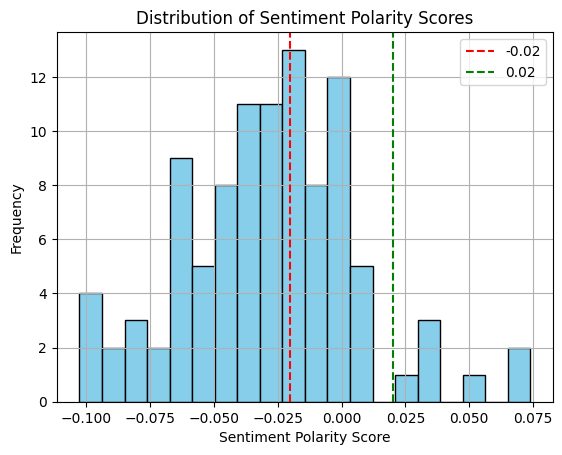

In [29]:
# plot histogram of sentiment polarity scores to analyze the distribution of the
# sentiment polarity score in the dataset
plt.hist(vi_text_file['sentiment_polarity_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')

# Add vertical lines at -0.02 and 0.02 - neutral range.
plt.axvline(x=-0.02, color='r', linestyle='--', label='-0.02')
plt.axvline(x=0.02, color='g', linestyle='--', label='0.02')

plt.legend()  # Show legend
plt.grid(True)
plt.show()

In [30]:
# coun the number of occurances of each sentiment label
sentiment_counts = vi_text_file['sentiment'].value_counts()

**To show the percentages on each bar:**
1. We calculate the total count by summing all the counts in the sentiment_counts Series.
2. We use this total count to compute the percentage of each sentiment label relative to the total count.
3. We annotate each bar with its correct percentage value, ensuring that the percentages sum up to 100%.

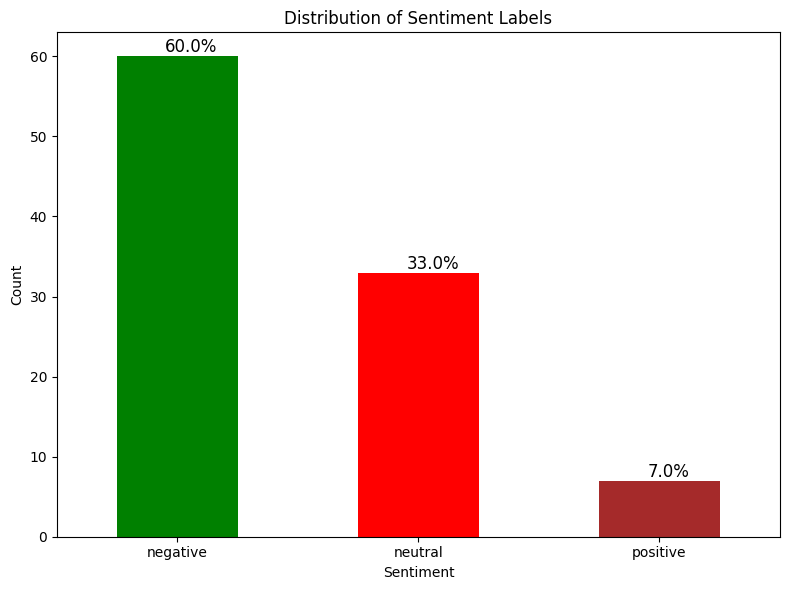

In [31]:
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=['green', 'red', 'brown'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels

# Calculate total count
total = float(sum(sentiment_counts))

# Annotate each bar with its percentage value
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

# Conclusion:
In the sample dataset of 100 records, we have 60% negative, 33% neutral, and 7% positive on the sentiment polarity score analysis.